In [0]:
from fastai.collab import * #importing libraries
from fastai.tabular import *

In [2]:
from google.colab import drive #mounting drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Collaborative filtering example

`collab` models use data in a `DataFrame` of user, items, and ratings.

In [0]:
user,item,title = 'userId','movieId','title' #dataframe categories 

In [6]:
path = untar_data(URLs.ML_SAMPLE) #dl data
path

PosixPath('/root/.fastai/data/movie_lens_sample')

In [7]:
ratings = pd.read_csv(path/'ratings.csv') #show the data to make sure it's loaded correctly
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


That's all we need to create and train a model:

In [0]:
data = CollabDataBunch.from_df(ratings, seed=42) #databunch

In [0]:
y_range = [0,5.5] #opt range

In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range) #loading our learner

In [11]:
learn.fit_one_cycle(3, 5e-3) #fit

epoch,train_loss,valid_loss,time
0,1.615012,0.933363,00:01
1,0.851047,0.678985,00:00
2,0.653023,0.669470,00:00


## Movielens 100k

Let's try with the full Movielens 100k data dataset, available from http://files.grouplens.org/datasets/movielens/ml-100k.zip

In [12]:
! unzip /content/drive/My\ Drive/fastai/ml-100k.zip #unzipping the dataset from the drive

Archive:  /content/drive/My Drive/fastai/ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [15]:
ratings = pd.read_csv('/content/ml-100k/u.data', delimiter='\t', header=None, #reading the csv file
                      names=[user,item,'rating','timestamp'])
ratings.head() #showing first five rows

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [17]:
movies = pd.read_csv('/content/ml-100k/u.item',  delimiter='|', encoding='latin-1', header=None, #read csv file (items)
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head() #showing the first five rows

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [18]:
len(ratings) #see length of the ratings column

100000

In [20]:
rating_movie = ratings.merge(movies[[item, title]]) #merge ratings columns
rating_movie.head() #show the first five rows

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title) #set databunch of rating_movie 

In [22]:
data.show_batch() #show first five rows

userId,title,target
416,"Three Caballeros, The (1945)",3.0
489,"Man Who Knew Too Little, The (1997)",3.0
592,Trees Lounge (1996),4.0
919,Private Parts (1997),4.0
338,"Maltese Falcon, The (1941)",5.0


In [0]:
y_range = [0,5.5] #range

In [0]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1) #load learner

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


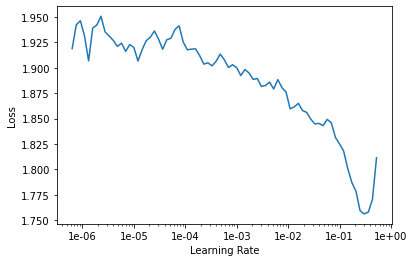

In [25]:
learn.lr_find() #find learning rate
learn.recorder.plot(skip_end=15)

In [26]:
learn.fit_one_cycle(5, 5e-3) #fit

epoch,train_loss,valid_loss,time
0,0.926253,0.947649,00:08
1,0.852829,0.887302,00:08
2,0.788190,0.836818,00:08
3,0.640632,0.815801,00:09
4,0.554331,0.815742,00:08


In [0]:
learn.save('dotprod') #save

Here's [some benchmarks](https://www.librec.net/release/v1.3/example.html) on the same dataset for the popular Librec system for collaborative filtering. They show best results based on RMSE of 0.91, which corresponds to an MSE of `0.91**2 = 0.83`.

## Interpretation

### Setup

In [0]:
learn.load('dotprod'); #load

In [29]:
learn.model #let's see what our model is made of

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [30]:
g = rating_movie.groupby(title)['rating'].count() #group movies by rating
top_movies = g.sort_values(ascending=False).index.values[:1000] #sort the 1000 best movies
top_movies[:10] #see the top 10

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

### Movie bias

In [31]:
movie_bias = learn.bias(top_movies, is_item=True) #use the top movies has a bias
movie_bias.shape #see how many we have to make sure it's loaded correctly

torch.Size([1000])

In [0]:
mean_ratings = rating_movie.groupby(title)['rating'].mean() #find the mean rating of movies
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)] #find the rating according to the mean and bias

In [0]:
item0 = lambda o:o[0]

In [34]:
sorted(movie_ratings, key=item0)[:15] #see the worst 15

[(tensor(-0.3668),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.2979), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2864),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2717), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2612), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2371), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2365), 'Beautician and the Beast, The (1997)', 2.313953488372093),
 (tensor(-0.2361), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2284), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2284), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2245), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2199), "McHale's Navy (1997)", 2.1884057971014492),
 (tensor(-0.2181), 'Speed 2: Cruise Control (1997)', 2.1315789473684212),
 (tensor(-0.2155), 'Showgirls (1995)', 1.956521739130434

In [35]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15] # see the top 15

[(tensor(0.6254), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5760), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5748), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5563), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5403), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5375), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5118), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.5102), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.5020), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4975), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.4761), 'To Kill a Mockingbird (1962)', 4.292237442922374),
 (tensor(0.4754), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4623), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.4562), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4519), 'Apt Pupil (1998)', 4.1)]

### Movie weights

In [36]:
movie_w = learn.weight(top_movies, is_item=True) #learn the top movies as weights of the model
movie_w.shape #see the shape

torch.Size([1000, 40])

In [37]:
movie_pca = movie_w.pca(3) #take 3 weights
movie_pca.shape

torch.Size([1000, 3])

In [0]:
fac0,fac1,fac2 = movie_pca.t() #3 categories
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

In [41]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.2830), "McHale's Navy (1997)"),
 (tensor(1.2524), 'Home Alone 3 (1997)'),
 (tensor(1.2013), 'Jungle2Jungle (1997)'),
 (tensor(1.1541), 'Leave It to Beaver (1997)'),
 (tensor(1.1078), 'Congo (1995)'),
 (tensor(1.1032), 'Bio-Dome (1996)'),
 (tensor(1.0824), 'Flipper (1996)'),
 (tensor(1.0358), 'Children of the Corn: The Gathering (1996)'),
 (tensor(1.0254), 'Free Willy 3: The Rescue (1997)'),
 (tensor(1.0069), 'Mortal Kombat: Annihilation (1997)')]

In [42]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.1563), 'Close Shave, A (1995)'),
 (tensor(-1.1193), 'Wrong Trousers, The (1993)'),
 (tensor(-1.0513), 'When We Were Kings (1996)'),
 (tensor(-1.0274), 'Chinatown (1974)'),
 (tensor(-1.0127), 'Third Man, The (1949)'),
 (tensor(-1.0119),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'),
 (tensor(-1.0007), 'Casablanca (1942)'),
 (tensor(-0.9893), 'Lawrence of Arabia (1962)'),
 (tensor(-0.9806), 'Wallace & Gromit: The Best of Aardman Animation (1996)'),
 (tensor(-0.9656), 'Citizen Kane (1941)')]

In [0]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [44]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.9043), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(0.8966), 'Keys to Tulsa (1997)'),
 (tensor(0.8624), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(0.8139), 'Stupids, The (1996)'),
 (tensor(0.8033), 'Trainspotting (1996)'),
 (tensor(0.7753), 'Lost Highway (1997)'),
 (tensor(0.7593), 'Serial Mom (1994)'),
 (tensor(0.7336), 'Clockwork Orange, A (1971)'),
 (tensor(0.7175), 'Stuart Saves His Family (1995)'),
 (tensor(0.7159), 'Beavis and Butt-head Do America (1996)')]

In [45]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.2184), 'Braveheart (1995)'),
 (tensor(-1.0737), 'Titanic (1997)'),
 (tensor(-1.0694), 'Raiders of the Lost Ark (1981)'),
 (tensor(-0.9757), "It's a Wonderful Life (1946)"),
 (tensor(-0.8925), 'Independence Day (ID4) (1996)'),
 (tensor(-0.8432), "Mr. Holland's Opus (1995)"),
 (tensor(-0.8276), 'Star Wars (1977)'),
 (tensor(-0.8147), 'Air Force One (1997)'),
 (tensor(-0.8146), 'Return of the Jedi (1983)'),
 (tensor(-0.8143), 'Forrest Gump (1994)')]

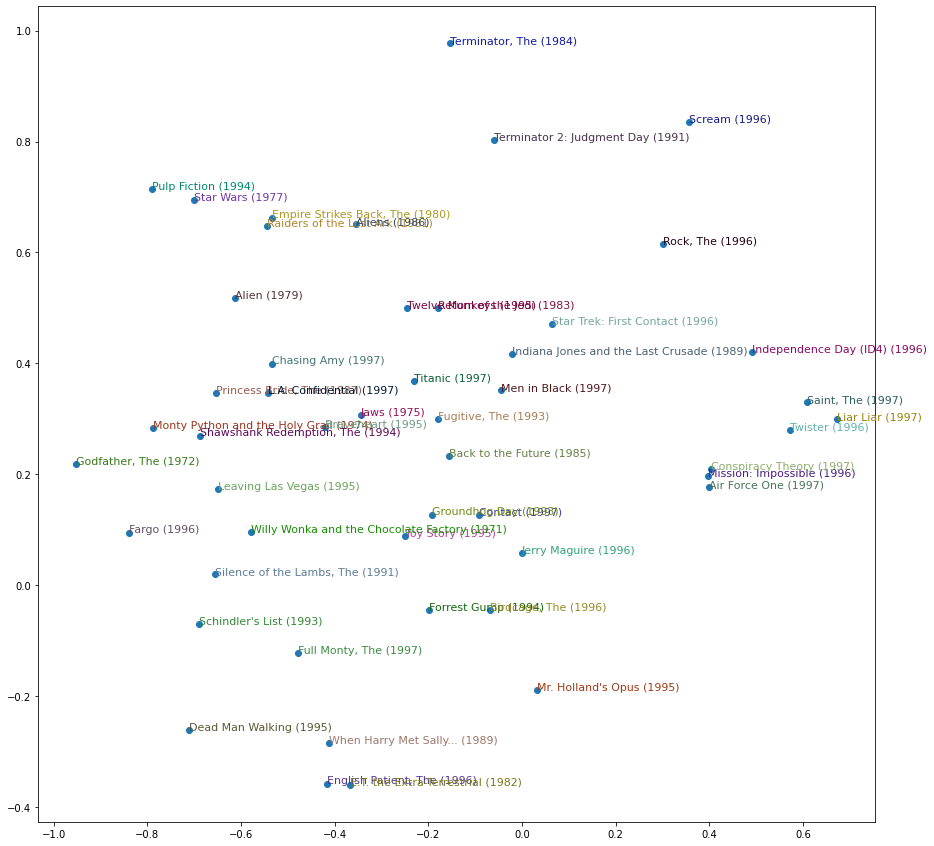

In [46]:
idxs = np.random.choice(len(top_movies), 50, replace=False) #select 50 movies randomly
idxs = list(range(50)) #range 50
X = fac0[idxs] # first category
Y = fac2[idxs] #second category
plt.figure(figsize=(15,15)) #figure size
plt.scatter(X, Y) #plotting x and y
for i, x, y in zip(top_movies[idxs], X, Y): #plot the data
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show() #show